## IIBM Bootcamp 2025: Day 4 Afternoon
### Instructors Carlos Valle (cgvalle@uc.cl) and Nicolás Garrido (nagarrido@uc.cl)


This jupyter noteboook will cover how to work with derivatives and integrals in Python

### Day Agenda:

***Morning***

10. Calculus:
    * Derivatives
    * Integrals
    * Descrite implementation
***Afternoon***

11. Group Project
    * Understanding integrals visually.
    * Your first image filter
    

**Don't forget to send your work!**


## 1. Integrals

The integral allows the perfom the inverse proces of derivation. If acceleration is the derivative of speed, speed is obtained by the integral of acceleration. By the [Fundamental theorem of calculus](https://en.wikipedia.org/wiki/Fundamental_theorem_of_calculus):

$$
\dfrac{d}{dx} \int_{a}^{x} f(t) dt = f(x)
$$

We can understand integration as the inverse process of differentiation. So if we have the derivate of function, we can integrate it to get the original function.

In simple terms integrate is obtaining the area under the curve for a specific range of values $(a, b)$. Although we are talking about area, if the curve is below the $x$ axis the result of the integration can be a negative value.

![Area under curve](https://raw.githubusercontent.com/cgvalle/IIBM-BootCamp-2025/main/images/D5_area_integral.png)
source: https://en.wikipedia.org/wiki/Integral

As shown in the figure, since the left size of the integral of $f(x)$ is above the $x$ axis, the area obtained has a positive value and the middle part of the integral of $f(x)$ has a negative value since it below 0.

While working with discrete functions, the integral of a vector can be understand has the cumulative sum of it values.

### 1.1 Excersice
Let's use again the daily covid cases provided by [MinCiencia](https://github.com/MinCiencia/Datos-COVID19). Previously, you worked with the original time-series (Dias, Casos_nuevos) to create plots and measure the semanal daily cases.

Sadly, someone deleted the previous file so it no longer available, but only a plot of how the data looks is available (**Figure 1**). Fortunately, there is a backup that has the derivative of the covid daily cases. It is your work to integrate the derivated time-series to get the original values.

![Daily covid cases Chile](https://raw.githubusercontent.com/cgvalle/IIBM-BootCamp-2024/main/assets/D4/daily_cases.png)
**Figure 1.** Daily covid cases Chile

**Hint:** you can use the [`integrate.cumtrapz`](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.integrate.cumtrapz.html) of `scipy` library to integrate a vector. The same function in matlab may have a similar name.




1. Plot the derivative of the original covid cases vector variable `derivated_casos_nuevos`. It is always good to look at how the data looks.
2. Integrate of the variable `derivated_casos_nuevos` to reconstruct the original plot.
3. In the same plot, plot the original and derivated values for the daily covid cases in Chile.

In [1]:
# Do not modify
!curl -O https://raw.githubusercontent.com/CarlosValleA/IIBM-BootCamp-2023/main/assets/D4/daily_cases_derivated.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  8779  100  8779    0     0  27896      0 --:--:-- --:--:-- --:--:-- 27958


In [32]:
%%time
import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate
from time import time

# Loading the derivated data
with open('daily_cases_derivated.csv') as file:
    lines = file.readlines()
    lines = [float(line.replace('\n', '').split(',')[1]) for line in lines]
daily_cases_derivated = lines


# Plotting the full figure
# fig = plt.figure(figsize=(10, 10))  # Creating figure
# ax = plt.subplot(1, 1, 1)  # Creating subplot
# ax.plot(x, f_x3(x) )  # Actually plotting
# plt.title("No zoom")
# plt.show()

t1 = time()
vec1 = np.array(daily_cases_derivated)
vec2 = np.array((daily_cases_derivated[1:] + [0]))
diffs = (vec1 + vec2)/2
m_int = np.cumsum(diffs)
t2 = time()


t2-t1


y_int = integrate.cumtrapz(vec1, initial=0)

CPU times: user 1.79 ms, sys: 0 ns, total: 1.79 ms
Wall time: 2.28 ms


<timed exec>:31: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0


In [33]:
%%time
vec1 = np.array(daily_cases_derivated)
vec2 = np.array((daily_cases_derivated[1:] + [0]))
diffs = (vec1 + vec2)/2
m_int = np.cumsum(diffs)

CPU times: user 1.6 ms, sys: 0 ns, total: 1.6 ms
Wall time: 1.46 ms


In [34]:
%%time
vec1 = np.array(daily_cases_derivated)
y_int = integrate.cumtrapz(vec1, initial=0)

CPU times: user 1.42 ms, sys: 0 ns, total: 1.42 ms
Wall time: 1.41 ms


<timed exec>:2: DeprecationWarning: 'scipy.integrate.cumtrapz' is deprecated in favour of 'scipy.integrate.cumulative_trapezoid' and will be removed in SciPy 1.14.0


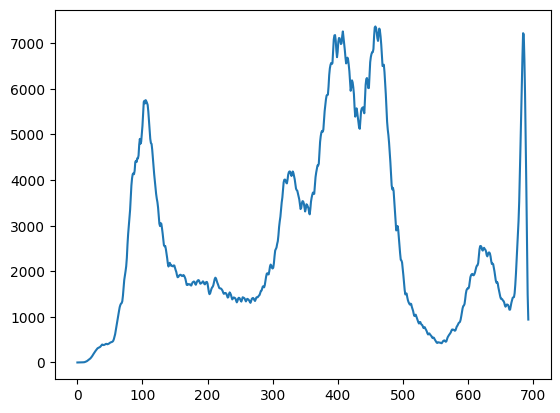

In [30]:
# plt.plot(y_int)
plt.plot(m_int)

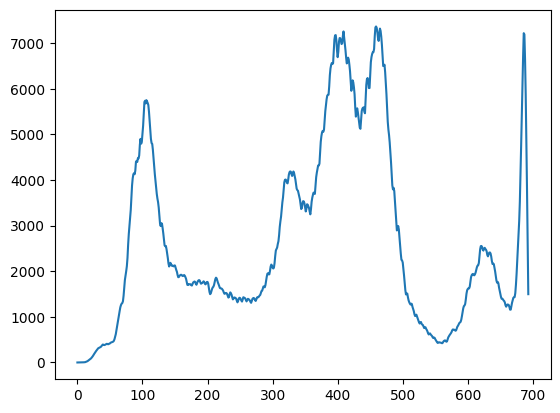

In [31]:
plt.plot(y_int)

### 1.2 Repeate the same analysis on Matlab. With the command below download the data:

```R
url = "https://github.com/CarlosValleA/IIBM-BootCamp-2023/raw/main/assets/D4/daily_cases_derivated.mat"
websave('daily_cases_derivated.mat', url)
```
When you finish, please copy and paste your code here.

## 2. Filtering images with convolutions
In image processing, a convolution is the process of adding each element of the image to its local neighbors, weighted by the kernel. In short terms, the kernel (a matrix) is move along all directions of an image doint point-wise operations between the kernel and the image.

![convolution](https://upload.wikimedia.org/wikipedia/commons/1/19/2D_Convolution_Animation.gif)

The [kernel](https://setosa.io/ev/image-kernels/) is usually a square matrix with odd dimension ($3x3$, $5x5$, $7x7$, etc.) that can perform blurring, sharpening, edge detection, etc. in a image. Examples for kernels are:

$$
blur = \dfrac{1}{9}
\left [ \begin{array}{c}
1 & 1 & 1\\
1 & 1 & 1\\
1 & 1 & 1
\end{array}\right ]
$$


$$
sharpen =
\left [ \begin{array}{c}
0 & -1 & 0\\
-1 & 5 & -1\\
0 & -1 & 0
\end{array}\right ]
$$

$$
sobel_X =
\left [ \begin{array}{c}
-1 & 0 & 1\\
-2 & 0 & 2\\
-1 & 0 & 1
\end{array}\right ]
$$

$$
sobel_Y =
\left [ \begin{array}{c}
1 & 2 & 1\\
0 & 0 & 0\\
-1 & -2 & -1
\end{array}\right ]
$$

To apply a convolutional kernel to an image you can use the `filter2D` function of [opencv](https://github.com/opencv/opencv).

### 2.1 Exercise
1. Load the image `D5_completo.jpeg` using OpenCV (`cv2`) into a variable called `img` and plot it using Matplotlib (Don't forget `plt.show()`!).
2. Check the type of variable of `img`. What library it is using to store the image ?
3. The color of the image may not be displayed correctly. You can use the following command to discuss it.

`img_new = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)`

4. Search on the internet how to use the `filter2D` and apply the blur kernel, sharpen and sobelX kernel.
5. Create your own kernel and plot the results.

In [60]:
kernel1 = np.ones((5, 5), np.float32)/9
kernel2 = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
kernel3 = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, 0, 1]])

In [44]:
!curl -O https://raw.githubusercontent.com/cgvalle/IIBM-BootCamp-2024/main/assets/D4/completo.jpeg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  222k  100  222k    0     0  1442k      0 --:--:-- --:--:-- --:--:-- 1442k


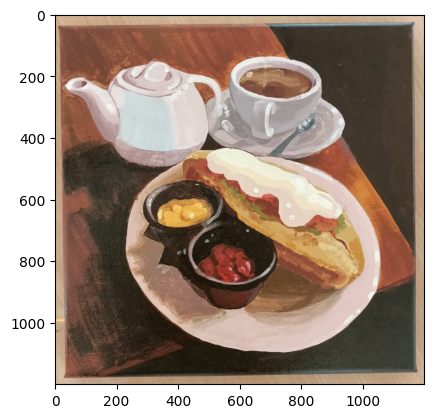

In [52]:
#%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread("completo.jpeg")
# img.shape

img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # little pre processing
# dosD = cv2.filter2D(img_cvt)
plt.imshow(img_cvt) #show the image
plt.show() # plot the image


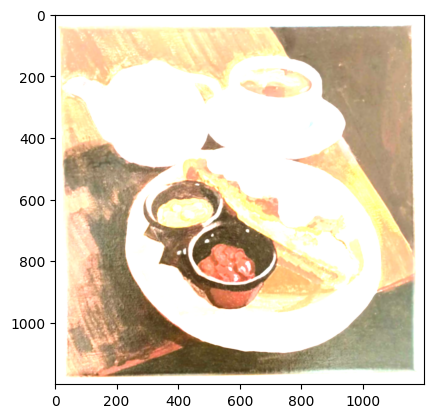

In [55]:
# blur
dosD = cv2.filter2D(src=img_cvt, ddepth=-1, kernel=kernel1)
plt.imshow(dosD) #show the image
plt.show() # plot the image

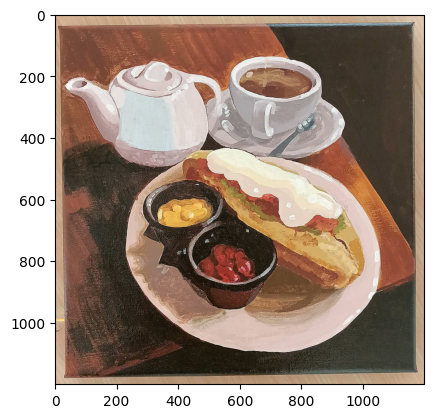

In [58]:
# sharpen
dosD = cv2.filter2D(src=img_cvt, ddepth=-1, kernel=kernel2)
plt.imshow(dosD) #show the image
plt.show() # plot the image

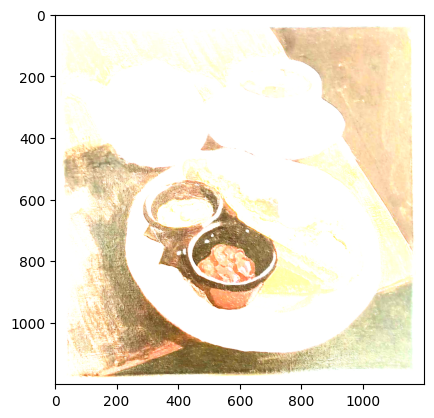

In [61]:
# sobelx
dosD = cv2.filter2D(src=img_cvt, ddepth=-1, kernel=kernel3)
plt.imshow(dosD) #show the image
plt.show() # plot the image


### 2.2 Matlab
Repeate the same analysis on Matlab. With the command below download the data:

```R
url = "https://raw.githubusercontent.com/cgvalle/IIBM-BootCamp-2024/main/assets/D4/completo.jpeg"
websave('completo.jpeg', url)
```
When you finish, please copy and paste your code here.

# **Don't forget to send your work!**
Please don't forget to send your work to give you feedback about your progress to this [form](https://forms.gle/sME7JXuoB4ztMCFq6). To send it, you need to download the Notebook from Colab's webpage and upload it in the last question of the form.